# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Loading the raw data

In [2]:
df = pd.read_csv('1.04.+Real-life+example (1).csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing
Exploring the descriptive statistics of the variables

In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Determining the variables of interest

In [5]:
data = df.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Exploring the PDFs

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

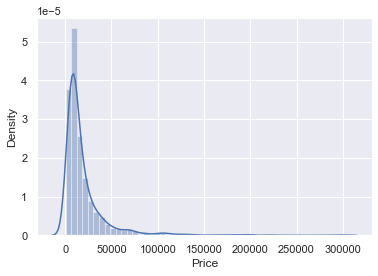

In [8]:
sns.distplot(data_no_mv['Price'])

# Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

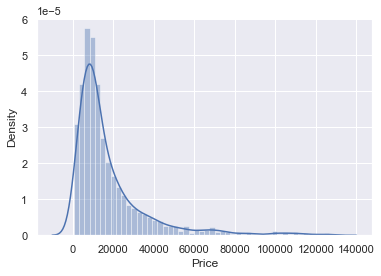

In [10]:
sns.distplot(data_1['Price'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

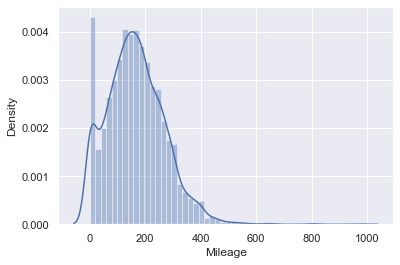

In [11]:
sns.distplot(data_1['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

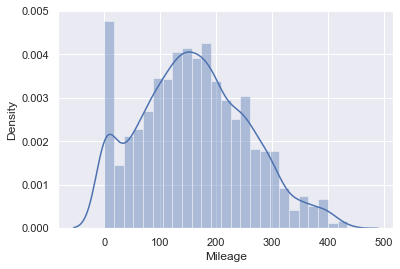

In [13]:
sns.distplot(data_2['Mileage'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

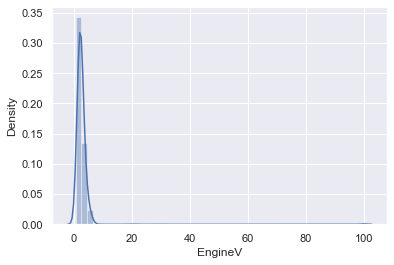

In [14]:
sns.distplot(data_2['EngineV'])

In [15]:

data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

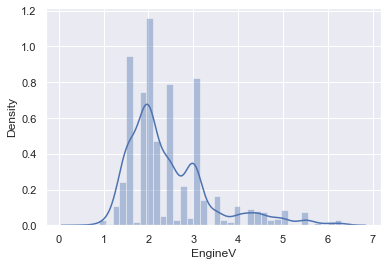

In [16]:
sns.distplot(data_3['EngineV'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

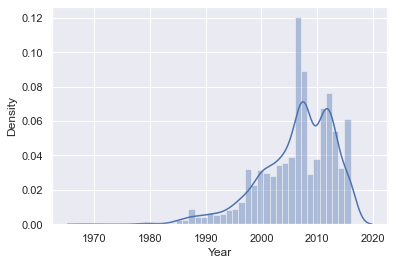

In [17]:
sns.distplot(data_3['Year'])

In [18]:
q = data_3['Year'].quantile(0.1)
data_4 = data_3[data_3['Year']>q]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3459.000000,3459.000000,3459.000000,3459.000000
mean,19798.156652,147.932639,2.464053,2008.148598
std,19542.540521,86.691460,0.972008,4.575174
min,1200.000000,0.000000,0.600000,1999.000000
25%,8400.000000,85.000000,1.800000,2005.000000
50%,12850.000000,148.000000,2.200000,2008.000000
75%,23500.000000,205.000000,3.000000,2012.000000
max,129222.000000,427.000000,6.300000,2016.000000


In [19]:
data_cleaned = data_4.reset_index(drop = True)

In [20]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


# Checking the OLS Assumptions

# Checking Linearity

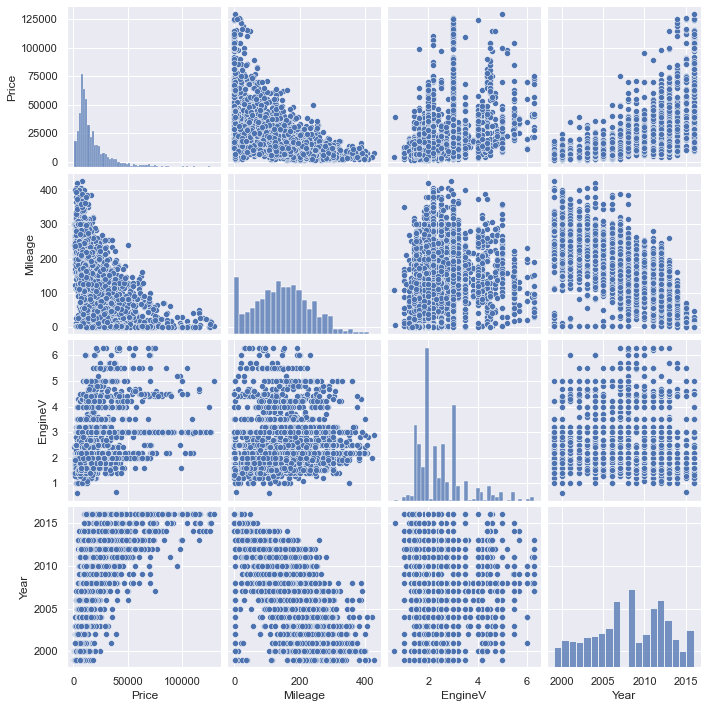

In [21]:
sns.pairplot(data_cleaned)

Our dataset is not linear

# Log Transformation

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned = data_cleaned[['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year', 'log_price']]

C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage', ylabel='log_price'>

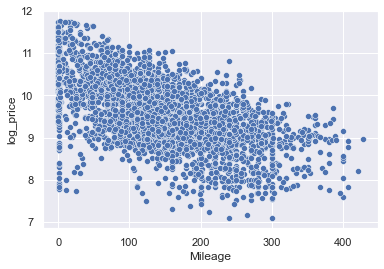

In [23]:
sns.scatterplot(data_cleaned['Mileage'],data_cleaned['log_price'])


C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineV', ylabel='log_price'>

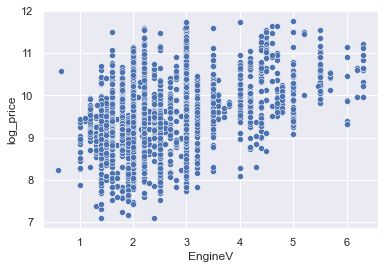

In [24]:
sns.scatterplot(data_cleaned['EngineV'],data_cleaned['log_price'])


C:\Users\padma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='log_price'>

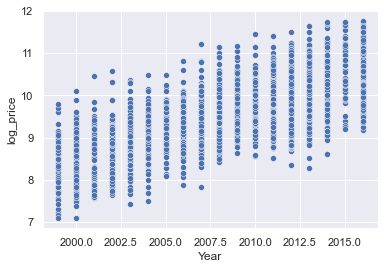

In [25]:
sns.scatterplot(data_cleaned['Year'],data_cleaned['log_price'])

In [26]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


# Multicollinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]

In [30]:
variables

,Mileage,EngineV,Year
0,427,2.9,1999
1,358,5.0,2003
2,240,4.2,2007
3,120,2.0,2011
4,200,2.7,2006
...,...,...,...
3454,163,2.5,2008
3455,35,1.6,2014
3456,9,3.0,2014
3457,1,3.5,1999


In [31]:
vif = pd.DataFrame()

In [32]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]

In [33]:
vif

,VIF
0,3.891813
1,7.424041
2,10.133661


In [34]:
vif['FEATURES'] = variables.columns

In [35]:
vif

,VIF,FEATURES
0,3.891813,Mileage
1,7.424041,EngineV
2,10.133661,Year


In [36]:
data_cleaned = data_cleaned.drop('Year', axis = 1)

In [37]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Create Dummy Variables

In [38]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [39]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3455,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3456,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3457,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [40]:
x = data_with_dummies.drop(['log_price'],axis = 1)

In [41]:
x

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3455,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3456,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3457,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [42]:
y = data_with_dummies['log_price']

In [43]:
vif1 = pd.DataFrame()

In [44]:
vif1['VIF']  = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [45]:
vif1

,VIF
0,4.682532
1,8.268215
2,2.235083
3,2.953529
4,1.723686
5,2.241776
6,2.333765
7,2.965009
8,1.435331
9,1.523559


In [46]:
vif1['Feature'] = x.columns

In [47]:
vif1

,VIF,Feature
0,4.682532,Mileage
1,8.268215,EngineV
2,2.235083,Brand_BMW
3,2.953529,Brand_Mercedes-Benz
4,1.723686,Brand_Mitsubishi
5,2.241776,Brand_Renault
6,2.333765,Brand_Toyota
7,2.965009,Brand_Volkswagen
8,1.435331,Body_hatch
9,1.523559,Body_other


In [73]:
data_with_dummies = data_with_dummies.drop(['Registration_yes'], axis = 1)

In [74]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3455,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3456,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3457,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1


# Rearrange the columns

In [75]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [76]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [77]:
data_preprocessed = data_with_dummies[cols]

In [78]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3455,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3456,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3457,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1


# Data Preprocessed

### Declare the Inputs and Targets

In [79]:
target = data_preprocessed['log_price']

In [80]:
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [81]:
target

0        8.974618
1        9.495519
2       10.043249
3        9.814656
4        9.560997
          ...    
3454     9.350102
3455     9.792556
3456    11.736069
3457     8.779557
3458     9.510445
Name: log_price, Length: 3459, dtype: float64

In [82]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3455,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3456,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3457,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1


### Scale the data

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
scaled_inputs = scaler.fit_transform(inputs)

In [86]:
scaled_inputs

array([[ 3.21955251,  0.4485661 , -0.41729416, ..., -0.39115214,
        -0.16344466, -0.73442893],
       [ 2.42351129,  2.60935454, -0.41729416, ...,  2.55654996,
        -0.16344466, -0.73442893],
       [ 1.06216543,  1.78619704, -0.41729416, ..., -0.39115214,
        -0.16344466,  1.36160214],
       ...,
       [-1.60284215,  0.55146079, -0.41729416, ..., -0.39115214,
        -0.16344466, -0.73442893],
       [-1.69513679,  1.06593423,  2.39639105, ..., -0.39115214,
        -0.16344466,  1.36160214],
       [-0.27610678, -0.47748608, -0.41729416, ..., -0.39115214,
        -0.16344466, -0.73442893]])

### Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, target, test_size=0.2, random_state=365)

# Create the Regression

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
reg = LinearRegression()

In [91]:
reg.fit(X_train,y_train)

LinearRegression()

In [92]:
reg_predict = reg.predict(X_train)

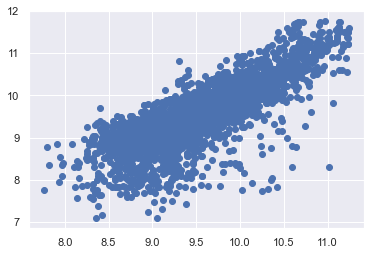

In [93]:
plt.scatter(reg_predict, y_train)

In [94]:
Residuals = y_train-reg_predict

In [95]:
Residuals

500     0.034568
2551   -0.240865
306     0.064723
3025    0.121249
2198    0.457887
          ...   
2309    0.209702
428    -0.763273
859     0.270038
801     0.687712
2740    0.900808
Name: log_price, Length: 2767, dtype: float64

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

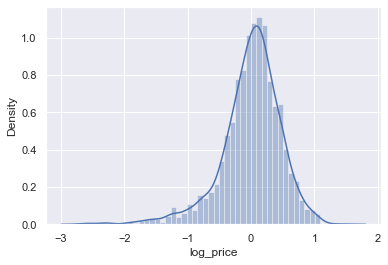

In [96]:
sns.distplot(Residuals)

##### r2 score

In [97]:
reg.score(X_train,y_train)

0.6589665010402261

#### Weights and Bias

In [98]:
reg.coef_

array([-0.49349202,  0.21927993,  0.03193773,  0.04499594, -0.12857214,
       -0.16042151, -0.04019494, -0.04846417, -0.14827492, -0.08768572,
       -0.16998102, -0.14750508, -0.1291413 , -0.0593921 , -0.0321845 ,
       -0.10213367])

In [99]:
reg.intercept_

9.544774379200122

In [100]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [101]:
reg_summary

,Features,Weights
0,Mileage,-0.493492
1,EngineV,0.219280
2,Brand_BMW,0.031938
3,Brand_Mercedes-Benz,0.044996
4,Brand_Mitsubishi,-0.128572
5,Brand_Renault,-0.160422
6,Brand_Toyota,-0.040195
7,Brand_Volkswagen,-0.048464
8,Body_hatch,-0.148275
9,Body_other,-0.087686


# Testing

In [102]:
reg_test_predictions = reg.predict(X_test)

(6.0, 13.0)

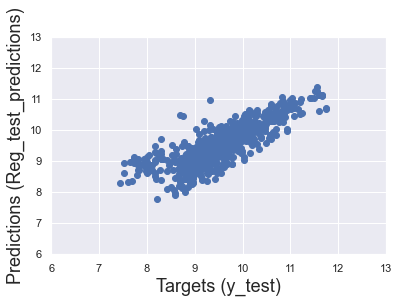

In [106]:
plt.scatter(y_test,reg_test_predictions)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (Reg_test_predictions)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)

In [107]:
reg_test_predictions

array([ 9.30362329, 10.08752926,  9.43412522,  8.9669282 ,  9.97645405,
        9.73552818,  9.59091256,  9.17508217,  9.08348737,  7.8846583 ,
        9.5235185 , 11.01266911,  8.9327797 ,  8.62232737,  9.99611369,
        8.84806675, 10.13466517,  8.94515618,  9.47652211,  9.85671006,
        8.60185103,  9.05022164,  9.63094225,  9.22177184, 10.41714044,
        8.99659791, 11.06866993,  8.62462436, 10.88479137,  9.00040539,
        9.17058037,  8.960404  ,  9.86198456,  9.78394983,  9.817769  ,
       10.02432123,  8.86968885, 10.11599593,  8.63103304,  9.7345426 ,
        9.92211922,  9.32404125,  9.40970037, 10.18205612,  8.94275663,
       11.0318396 ,  9.09376713,  8.42779122,  9.46652893, 10.15591914,
        8.88022037,  9.94169123,  9.29768555, 10.46528991, 10.53705173,
        9.60023787,  9.07374518, 10.18715102,  9.17878457,  9.65612225,
        8.27541496,  8.98411356,  9.72534456,  9.51406894, 10.21753389,
       10.37318151,  8.81321971,  9.06951356, 10.47507064, 10.63

In [110]:
df_predictions = pd.DataFrame(np.exp(reg_test_predictions), columns = ['Predictions'])

In [111]:
df_predictions.head()

,Predictions
0,10977.722710
1,24041.319201
2,12508.018831
3,7839.483226
4,21513.889917


In [112]:
df_predictions['targets']=np.exp(y_test)

In [113]:
df_predictions

,Predictions,targets
0,10977.722710,NaN
1,24041.319201,NaN
2,12508.018831,NaN
3,7839.483226,NaN
4,21513.889917,NaN
...,...,...
687,3004.766701,12000.0
688,24169.698139,NaN
689,7789.115822,NaN
690,39616.775248,NaN


In [114]:
y_test=y_test.reset_index(drop=True)

In [115]:
df_predictions['targets']=np.exp(y_test)

In [116]:
df_predictions

,Predictions,targets
0,10977.722710,21800.0
1,24041.319201,32000.0
2,12508.018831,8499.0
3,7839.483226,5400.0
4,21513.889917,28500.0
...,...,...
687,3004.766701,6650.0
688,24169.698139,33200.0
689,7789.115822,3000.0
690,39616.775248,25500.0


In [117]:
df_predictions['Residuals'] = df_predictions['Predictions']-df_predictions['targets']

In [125]:
df_predictions['Difference%'] = np.abs(df_predictions['Residuals']/df_predictions['targets']*100)

In [126]:
df_predictions

,Predictions,targets,Residuals,Difference%
0,10977.722710,21800.00,-10822.277290,49.643474
1,24041.319201,32000.00,-7958.680799,24.870877
2,12508.018831,8499.00,4009.018831,47.170477
3,7839.483226,5400.00,2439.483226,45.175615
4,21513.889917,28500.00,-6986.110083,24.512667
5,16907.763670,11800.00,5107.763670,43.286133
6,14631.215324,6500.00,8131.215324,125.095620
7,9653.561228,7600.00,2053.561228,27.020542
8,8808.631447,7450.00,1358.631447,18.236664
9,2656.217244,5400.00,-2743.782756,50.810792


In [127]:
df_predictions.describe()

,Predictions,targets,Residuals,Difference%
count,692.000000,692.000000,692.000000,692.000000
mean,17058.095927,19243.825448,-2185.729521,39.235579
std,13375.036284,19390.750145,10182.485566,52.286785
min,2396.379052,1700.000000,-82071.287761,0.044942
25%,8326.606826,8200.000000,-4242.168301,13.234103
50%,12302.613073,12450.000000,-628.177438,26.507495
75%,22012.951983,22900.000000,2642.895877,44.042393
max,88040.837275,126000.000000,45567.310678,494.412088


In [128]:
pd.set_option("display.max_rows", None)
df_predictions.sort_values(by=['Difference%'])

,Predictions,targets,Residuals,Difference%
568,6995.854506,6999.00,-3.145494,0.044942
173,6239.518455,6250.00,-10.481545,0.167705
399,12368.879575,12400.00,-31.120425,0.250971
530,22557.341323,22500.00,57.341323,0.254850
398,8629.679359,8600.00,29.679359,0.345109
534,51702.208830,51500.00,202.208830,0.392639
429,12047.177730,12000.00,47.177730,0.393148
542,9039.268883,9000.00,39.268883,0.436321
386,7740.716918,7777.00,-36.283082,0.466543
421,18814.698753,18700.00,114.698753,0.613362
